> [Lec-02-Simple Linear Regression](https://youtu.be/Mx7oqTKwhIA?list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

# Regression

Regression의 사전적 의미는 후퇴, 퇴행, 회귀.

Sir Francis Galton(1822~1911) 라는 사람이 말한 `Regression toward the mean`에서 따왔다.

주어진 값들을 잘 대표할 수 있는 식을 만드는 것이 목표다.

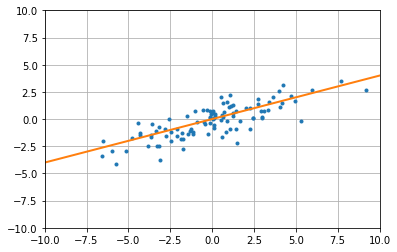

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_points = 100
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0, 3)
    y1 = x1 * 0.4 + np.random.normal(0, 1)
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, 'o', markersize=3)
plt.plot([-20, 20], [-20 * 0.4, 20 * 0.4], linewidth=2)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True, which='major')

위와 같은 파란점을 보고서, 주황점을 예측하는 것이다.

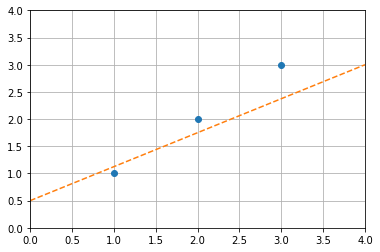

In [ ]:
plt.plot([1, 2, 3], [1, 2, 3], 'o')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid()
plt.plot([0, 4], [.5, 3], '--')

일단은 선을 그어보고, 최적의 선을 찾는 것이 목표이다.

이 선을 Hypothesis, 가설이라고 한다.

\begin{equation*}
y = ax + b \\
H(x) = Wx + b
\end{equation*}

아래 식에서 W는 기울기(a) b는 절편(b)이라고 보면 된다.

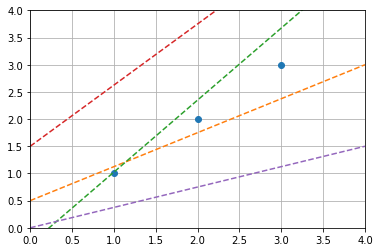

In [ ]:
plt.plot([1, 2, 3], [1, 2, 3], 'o')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid()
plt.plot([0, 4], [.5, 3], '--')
plt.plot([0, 4], [-.3, 5], '--')
plt.plot([0, 4], [1.5, 6], '--')
plt.plot([0, 4], [0, 1.5], '--')

사람은 최적의 선이라는 것이 눈에 보이는데
컴퓨터는 어떻게 최적의 선이라는 것을 알 수 있을까?

그것이 바로 cost이다.
한글로 **비용**

실제 데이터와 예측한 데이터의 차를 구한 것.

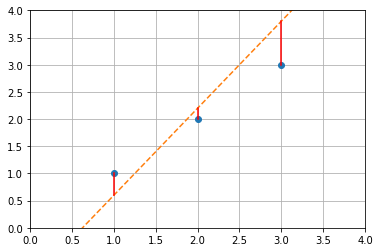

In [ ]:
def func(x):
    return 1.6 * x - 1

plt.plot([1, 2, 3], [1, 2, 3], 'o')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid()
plt.plot([0, 4], list(map(func, [0, 4])), '--')
plt.plot([1, 1], [1, func(1)], 'r')
plt.plot([2, 2], [2, func(2)], 'r')
plt.plot([3, 3], [3, func(3)], 'r')

위 그래프에서 빨간색 길이가 실제 데이터와의 차이라고 볼 수 있다.

차이가 많이 날 수록 비용은 더 커져야 안 좋은 직선임을 쉽게 식별 할 수 있다. 또한 차이가 음수가 되면 코스트 값이 0이 될 수 도 있어 차이를 제곱해준다.

$$
\frac {(H(x_1) - y_1)^2 + (H(x_2) - y_2)^2 + (H(x_3) - y_3)^2} 3
$$

이를 간단하게 정리하면 아래와 같다.
$$
cost(W) = \frac 1 m \sum_{i=1}^m {(Wx_i - y_i)^2}
$$

그러면 여기서 목표는 cost를 최대한 작게 줄이는 W, b값을 찾는 것이다.

# LAB

In [6]:
import tensorflow as tf

$H(x) = Wx + b$

In [7]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9)  # 초기값
b = tf.Variable(0.5)

hypothesis = W * x_data + b

$
cost(W, b) = \frac 1 m \sum_{i=1}^m {(H(x_i - y_i)^2)}
$

In [8]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

tf.reduce_mean() => 평균\
tf.square() => 제곱



Gradient descent라는 방법을 사용한다.

In [13]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9)  # 초기값
b = tf.Variable(0.5)

learning_rate = 0.01

for i in range(100+1):
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  W_grad, b_grad = tape.gradient(cost, [W, b])
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)
  if i % 10 == 0:
    print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059
  100|    1.0048|   -0.0173|  0.000055


결과적으로, 처음 초기화한 2.9, 0.5에서 1.0048, -0.0173으로 바뀌었다

(0.0, 8.0)

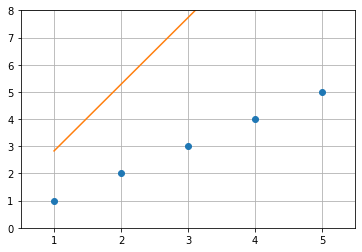

In [16]:
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], 'o')
plt.plot([1, 5], list(map(lambda x: 2.4520 * x + 0.3760, [1, 5])))
plt.grid()
plt.xlim(0.5, 5.5)
plt.ylim(0, 8)

(0.0, 8.0)

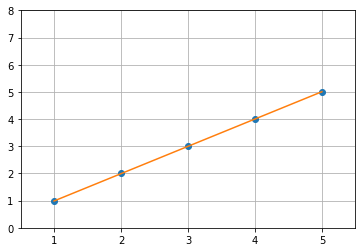

In [17]:
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], 'o')
plt.plot([1, 5], list(map(lambda x: 1.0048 * x - 0.0173, [1, 5])))
plt.grid()
plt.xlim(0.5, 5.5)
plt.ylim(0, 8)

이것을 바탕으로 예상까지 할 수 있다.

In [18]:
func = lambda x: W * x + b
print(func(5))
print(func(2.5))

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)
